In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import np_utils
%matplotlib inline
path = 'data/'

#### Import data

In [75]:
df = pd.read_csv(path + 'train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df_labels = df.iloc[:, [0]]
print(df_labels.head())
print(type(df_labels))

   label
0      1
1      0
2      1
3      4
4      0
<class 'pandas.core.frame.DataFrame'>


In [77]:
df_pixels = df.iloc[:, 1:]
print(df_pixels.head())
print(type(df_pixels))

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

In [78]:
from random import randint
rand_pixel = df_pixels.iloc[randint(0, 1000), :].values.reshape(28, 28)

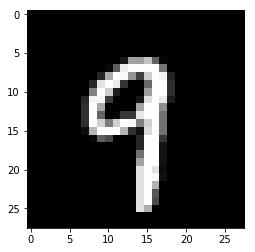

In [79]:
plt.imshow(rand_pixel, cmap='gray')
plt.show()

### Pre processing data

In [80]:
from keras.utils import np_utils
df_sample = df.iloc[:20000]
X = (df_sample.iloc[:,1:].values).astype('float32')
labels = df_sample['label'].values.astype('int32')
y = np_utils.to_categorical(labels)

scale = np.max(X)
X /= scale

mean = np.std(X)
X -= mean

input_dim = X.shape[1]
nb_classes = y.shape[1]

### Classification using neural net keras.

In [81]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

In [82]:
model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [83]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [84]:
model.fit(X, y, epochs=60, batch_size=32, verbose=2)

Epoch 1/60
 - 1s - loss: 0.4729 - acc: 0.8529
Epoch 2/60
 - 2s - loss: 0.2413 - acc: 0.9256
Epoch 3/60
 - 2s - loss: 0.1850 - acc: 0.9424
Epoch 4/60
 - 2s - loss: 0.1569 - acc: 0.9531
Epoch 5/60
 - 2s - loss: 0.1337 - acc: 0.9601
Epoch 6/60
 - 2s - loss: 0.1201 - acc: 0.9633
Epoch 7/60
 - 2s - loss: 0.1148 - acc: 0.9666
Epoch 8/60
 - 2s - loss: 0.1060 - acc: 0.9688
Epoch 9/60
 - 2s - loss: 0.0968 - acc: 0.9715
Epoch 10/60
 - 2s - loss: 0.0904 - acc: 0.9727
Epoch 11/60
 - 2s - loss: 0.0823 - acc: 0.9756
Epoch 12/60
 - 2s - loss: 0.0781 - acc: 0.9775
Epoch 13/60
 - 2s - loss: 0.0749 - acc: 0.9787
Epoch 14/60
 - 2s - loss: 0.0701 - acc: 0.9795
Epoch 15/60
 - 2s - loss: 0.0738 - acc: 0.9788
Epoch 16/60
 - 2s - loss: 0.0676 - acc: 0.9810
Epoch 17/60
 - 2s - loss: 0.0627 - acc: 0.9823
Epoch 18/60
 - 2s - loss: 0.0665 - acc: 0.9815
Epoch 19/60
 - 2s - loss: 0.0668 - acc: 0.9815
Epoch 20/60
 - 2s - loss: 0.0582 - acc: 0.9837
Epoch 21/60
 - 2s - loss: 0.0597 - acc: 0.9838
Epoch 22/60
 - 2s - lo

In [85]:
import cv2 as cv
from matplotlib import pyplot as plt
print(cv.__version__)

3.1.0


In [86]:
img = cv.imread('9.jpeg', 0)

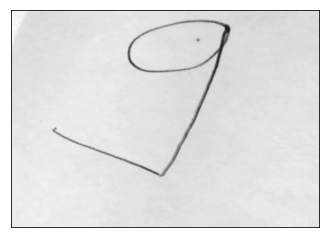

In [87]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

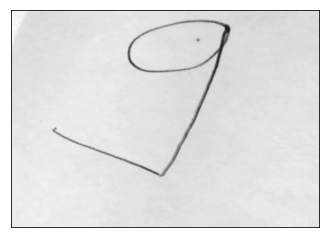

In [88]:
cropped = img[:, 40:554]
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

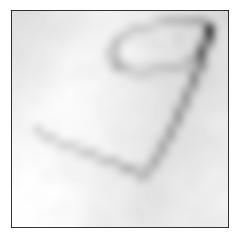

In [89]:
r = 28.0/cropped.shape[1]
dim = (28, int(cropped.shape[0]*r))
resized = cv.resize(cropped, dim, interpolation = cv.INTER_AREA)
plt.imshow(resized, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [90]:
type(resized)
resized.astype('float32')
resized =  resized/ scale
resized -= mean

In [91]:
preds = model.predict_classes(resized.reshape(1, 784), verbose=0)
print(preds)

[8]


In [92]:
img4 = cv.imread('4.jpg', cv.IMREAD_GRAYSCALE)

In [93]:
(thresh, im_bw) = cv.threshold(img4, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
cv.imwrite('bw_image.png', im_bw)
img2 = cv.bitwise_not(im_bw)
cv.imwrite('wb_image.png', im)

True

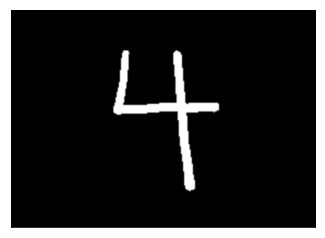

In [94]:
plt.imshow(img2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [95]:
img2.shape

(200, 280)

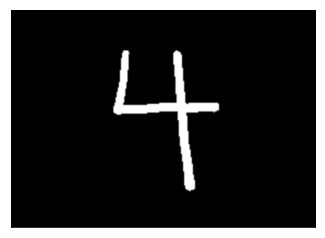

(514, 514)


In [96]:
cropped2 = img2[:, 40:240]
plt.imshow(img2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(cropped.shape)

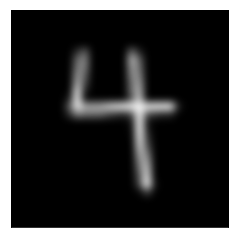

In [97]:
r = 28.0/cropped2.shape[1]
dim = (28, int(cropped2.shape[0]*r))
resized2 = cv.resize(cropped2, dim, interpolation = cv.INTER_AREA)
plt.imshow(resized2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [98]:
resized2 = resized2.reshape(1, 784)
resized2.astype('float32')
resized2 =  resized/ scale
resized2 -= mean

In [99]:
preds = model.predict_classes(resized2.reshape(1, 784), verbose=0)
print(preds)

[5]


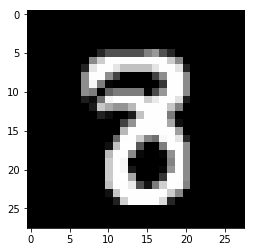

[8]


In [100]:
rand_pixel = df_pixels.iloc[randint(0, 1000), :].values.reshape(28, 28)
plt.imshow(rand_pixel, cmap='gray')
plt.show()
rand_pixel = rand_pixel.reshape(1, 784)
rand_pixel.astype('float32')
rand_pixel = rand_pixel/ scale
rand_pixel -= mean
preds = model.predict_classes(rand_pixel, verbose=0)
print(preds)